In [1]:
import numpy as np, matplotlib.pyplot as plt, os
dir = '2021_10_18_19_19_23' # enter date string of dataset

### Read in data

In [2]:
# read in data files, and take out means

#os.system('cd /mnt/data/dsa110/T1; ./create_full_beams.bash ' + dir)

d1,m1 = np.loadtxt('/mnt/data/dsa110/T1/corr01/'+dir+'/beams_corr01_59505.805243.dat').transpose()
#d1,m1 = np.loadtxt('../vikram/beams_corr01_59447.977303.dat').transpose()
n = int(np.floor(len(d1)/64))*64
d1 = d1[:n].reshape((int(len(d1)/64),64))[3:,:]
d2,m2 = np.loadtxt('/mnt/data/dsa110/T1/corr02/'+dir+'/beams_corr02_59505.805243.dat').transpose()
#d2,m2 = np.loadtxt('../vikram/beams_corr02_59447.977303.dat').transpose()
n = int(np.floor(len(d2)/64))*64
d2 = d2[:n].reshape((int(len(d2)/64),64))[3:,:]
d3,m3 = np.loadtxt('/mnt/data/dsa110/T1/corr09/'+dir+'/beams_corr09_59505.805243.dat').transpose()
#d3,m3 = np.loadtxt('../vikram/beams_corr09_59447.977303.dat').transpose()
n = int(np.floor(len(d3)/64))*64
d3 = d3[:n].reshape((int(len(d3)/64),64))[3:,:]
d4,m4 = np.loadtxt('/mnt/data/dsa110/T1/corr13/'+dir+'/beams_corr13_59505.805243.dat').transpose()
#d4,m4 = np.loadtxt('../vikram/beams_corr13_59447.977303.dat').transpose()
n = int(np.floor(len(d4)/64))*64
d4 = d4[:n].reshape((int(len(d4)/64),64))[3:,:]
m1 = m1.reshape((int(len(m1)/64),64))[3:,:]
m2 = m2.reshape((int(len(m2)/64),64))[3:,:]
m3 = m3.reshape((int(len(m3)/64),64))[3:,:]
m4 = m4.reshape((int(len(m4)/64),64))[3:,:]

mn1 = np.median(d4,axis=1)
for i in range(d4.shape[1]):
    d4[:,i]-=mn1
mn1 = np.median(d4,axis=0)
for i in range(d4.shape[0]):
    d4[i,:]-=mn1
mn1 = np.median(d3,axis=1)
for i in range(d3.shape[1]):
    d3[:,i]-=mn1
mn1 = np.median(d3,axis=0)
for i in range(d3.shape[0]):
    d3[i,:]-=mn1
mn1 = np.median(d2,axis=1)
for i in range(d2.shape[1]):
    d2[:,i]-=mn1
mn1 = np.median(d2,axis=0)
for i in range(d2.shape[0]):
    d2[i,:]-=mn1
mn1 = np.median(d1,axis=1)
for i in range(d1.shape[1]):
    d1[:,i]-=mn1
mn1 = np.median(d1,axis=0)
for i in range(d1.shape[0]):
    d1[i,:]-=mn1

In [8]:
print(np.max(d1))

0.0


### Plot power in each beam at each time

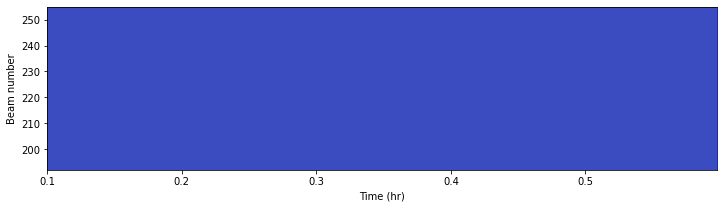

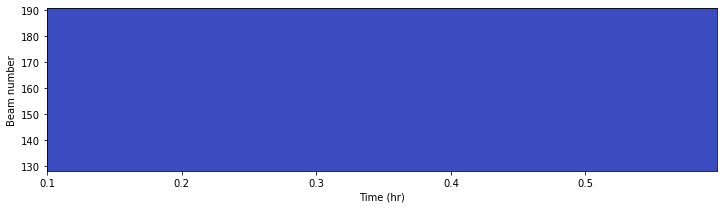

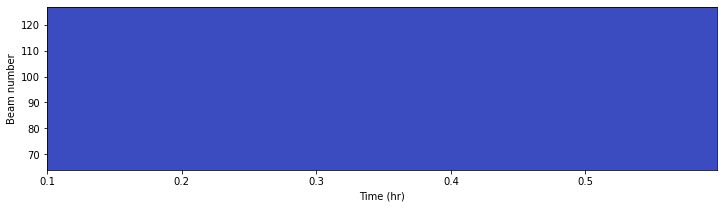

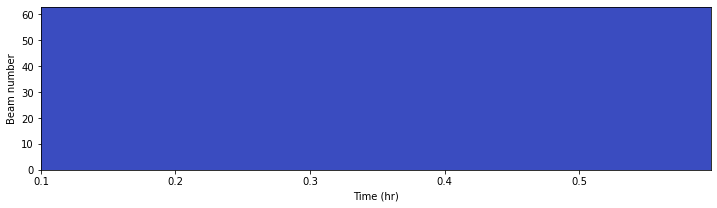

In [4]:
x1 = 0.1 # enter start hr of plotting
x2 = d4.shape[0]*4.294967296/3600. # enter end hr of plotting
vmin = np.median(d3)-1.*np.std(d3) # min saturation - adjust as needed
vmax = np.median(d3)+4.*np.std(d3) # max saturation - adjust as needed



plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d4.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d4.shape[0]*4.294967296/3600.,192,255])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d3.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d3.shape[0]*4.294967296/3600.,128,191])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d2.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d2.shape[0]*4.294967296/3600.,64,127])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d1.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d1.shape[0]*4.294967296/3600.,0,63])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.show()

### Plot the flag counts

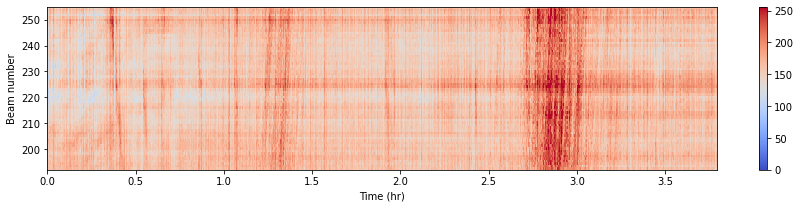

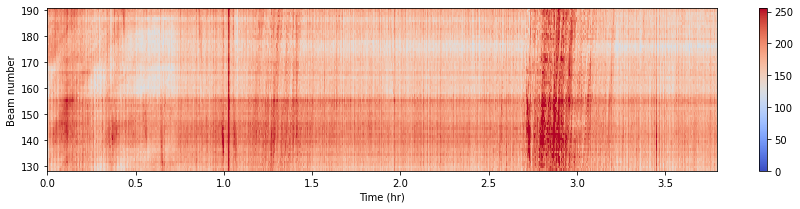

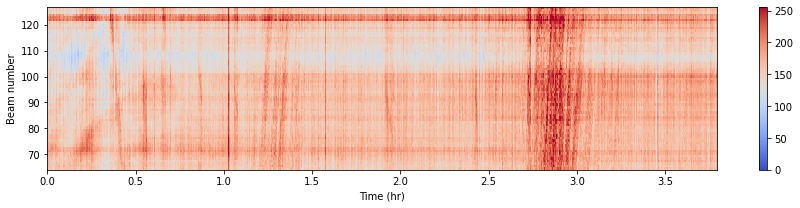

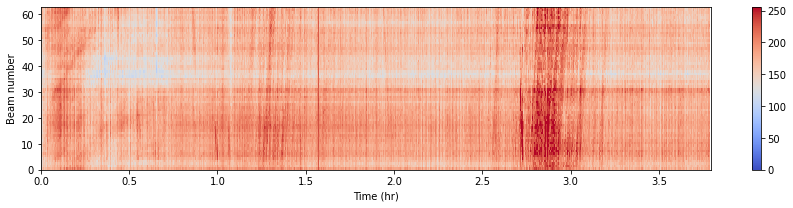

In [7]:
# This plot the number of channels flagged per beam per time interval. No need to adjust anything. 

vmin=0.
vmax=256.

plt.figure(figsize=(15,3))
plt.xlim(x1,x2)
plt.imshow(m4.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d4.shape[0]*4.294967296/3600.,192,255],vmin=vmin,vmax=vmax)
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()
plt.figure(figsize=(15,3))
plt.xlim(x1,x2)
plt.imshow(m3.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d3.shape[0]*4.294967296/3600.,128,191],vmin=vmin,vmax=vmax)
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()
plt.figure(figsize=(15,3))
plt.xlim(x1,x2)
plt.imshow(m2.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d2.shape[0]*4.294967296/3600.,64,127],vmin=vmin,vmax=vmax)
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()
plt.figure(figsize=(15,3))
plt.xlim(x1,x2)
plt.imshow(m1.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d1.shape[0]*4.294967296/3600.,0,63],vmin=vmin,vmax=vmax)
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()


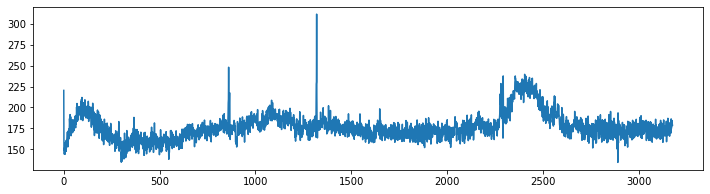

In [8]:
plt.figure(figsize=(12,3))
plt.plot(m1.mean(axis=1))